ANALISIS BIG DATA
*   Abdul Ghafur - 202110370311109



*   Osman Adika Rais - 202110370311214








# Library

Tahap pertama adalah mengimpor pustaka yang akan digunakan sepanjang proses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

Melakukan proses unduhan data dari tautan yang telah disediakan.

In [ ]:
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv
df = pd.read_csv("spotify_songs.csv")

--2024-12-23 07:51:51--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7971379 (7.6M) [text/plain]
Saving to: ‘spotify_songs.csv’

spotify_songs.csv   100%[===================>]   7.60M  --.-KB/s    in 0.1s    

2024-12-23 07:51:51 (55.8 MB/s) - ‘spotify_songs.csv’ saved [7971379/7971379]



Data yang akan digunakan untuk analisis

In [ ]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# Info Data

Pada tahap ini, kami melakukan analisis awal untuk memahami data secara lebih mendalam.

Pengecekan 5 Data teratas

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Pengecekan 5 Data terbawah

In [ ]:
df.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Berdasarkan infomasi diatas didapatkan bahwa
*   Data memiliki 22 atribut
*   Total sebanyak 32833 entries data
*   Tidak ada kolom yang memiliki missing value
*   Perbedaan type data, terdapat 10 atribut dengan type Object, 4 atribut dengan type int, dan 9 atribut dengan type float

Data ini merupakan Data Spotify yang berisi informasi terkait lagu, seperti identitas lagu, artis, album, serta berbagai atribut audio seperti popularitas, tempo, durasi, tingkat akustik, energi, dan karakteristik musikal lainnya.




# EDA

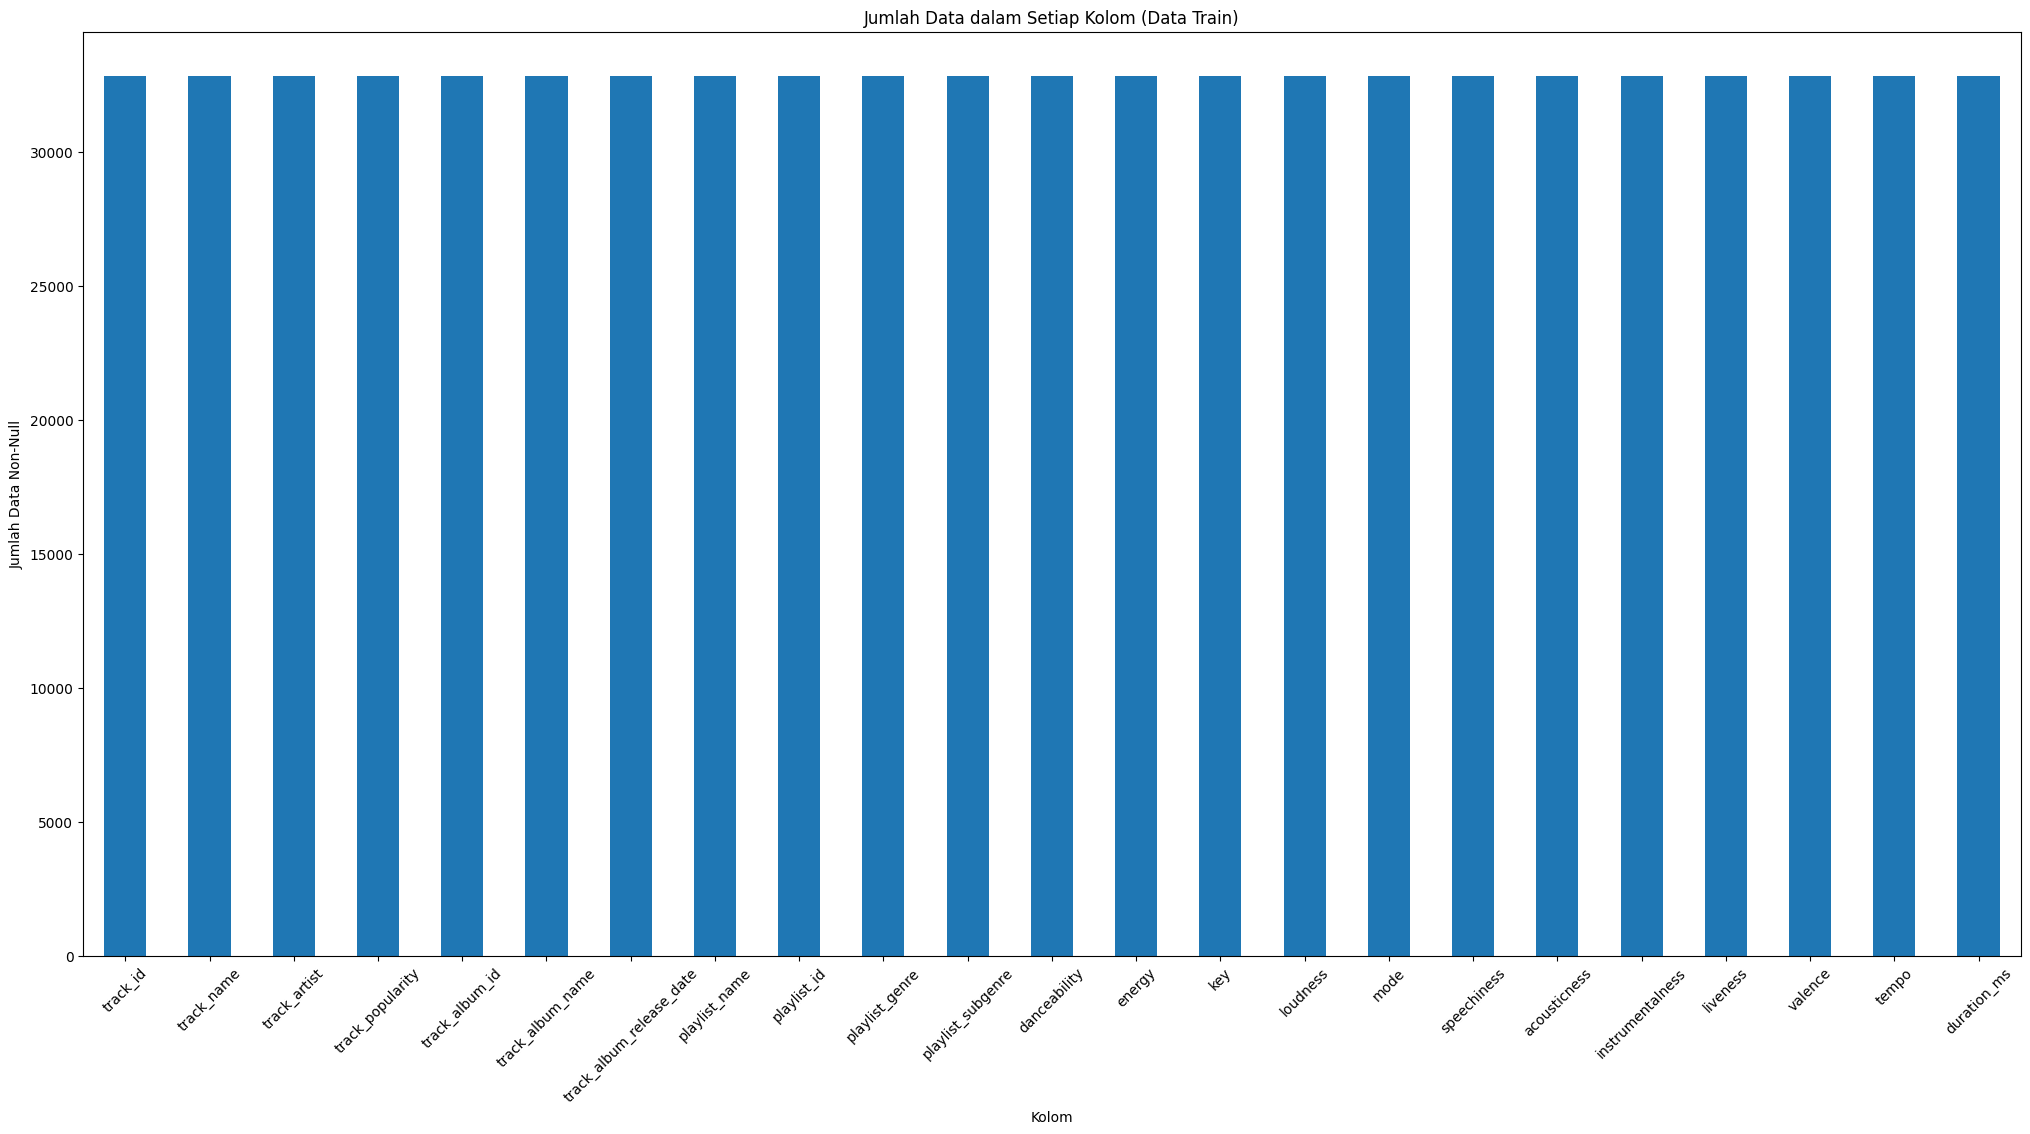

In [ ]:
jumlah_data_non_null_per_kolom = df.count()
total_data_per_kolom = df.shape[0]

# Total data/kolom
plt.figure(figsize=(25, 12))

# Plotting
jumlah_data_non_null_per_kolom.plot(kind='bar')
plt.title('Jumlah Data dalam Setiap Kolom (Data Train)')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Non-Null')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik diatas dinyatakan bahwa semua atribut atau kolom memiliki nilai yang sama, memiliki entries yang sama yang menegaskan bahwa tidak ada satupun atribut yang memiliki missing value.

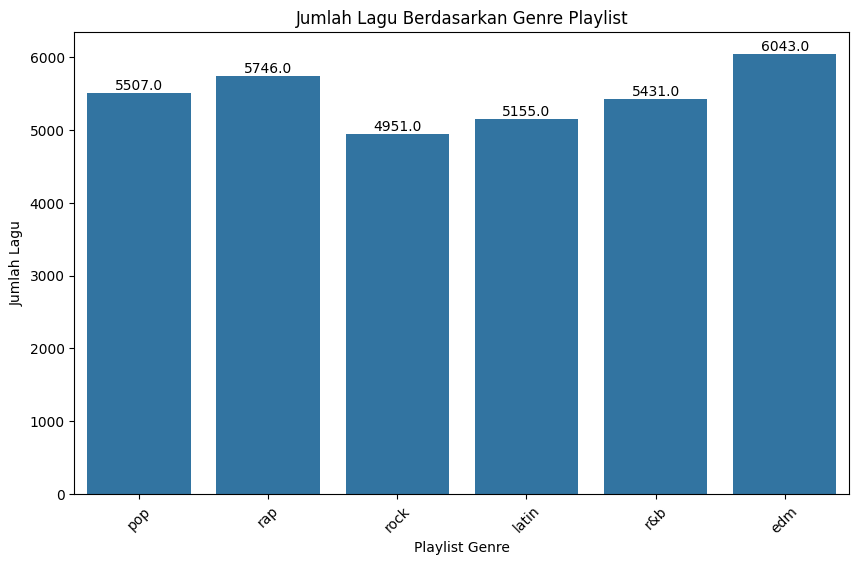

In [ ]:
# Plot countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='playlist_genre', data=df)

# Menambahkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan grafik
plt.title('Jumlah Lagu Berdasarkan Genre Playlist')
plt.xlabel('Playlist Genre')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()


Grafik di atas menunjukkan distribusi genre lagu dengan total 6 genre yang memiliki jumlah entri berbeda. Berikut rangkuman informasinya:
*   Genre EDM memiliki jumlah entri terbanyak, dengan total 6,043 entri.
*   Genre Rock memiliki jumlah entri paling sedikit, yaitu 4,951 entri.

Hal ini mengindikasikan bahwa genre EDM lebih dominan dibandingkan genre lainnya dalam dataset ini, sementara genre Rock memiliki representasi yang paling kecil.

In [ ]:
if 'track_album_release_date' in df.columns:
    # Convert the 'track_album_release_date' column to datetime objects
    df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

    # Now you can analyze the date range and year
    min_date = df['track_album_release_date'].min()
    max_date = df['track_album_release_date'].max()
    date_range = f"{min_date.date()} to {max_date.date()}"
    print(f"Date Range: {date_range}")

    # Further analysis, if needed:
    df['release_year'] = df['track_album_release_date'].dt.year
    year_counts = df['release_year'].value_counts()
    print("\nYear Counts:\n", year_counts)
else:
    print("Error: 'track_album_release_date' column not found in DataFrame.")

Date Range: 1957-01-01 to 2020-01-29

Year Counts:
 release_year
2019.0    9079
2018.0    3312
2017.0    2426
2016.0    2114
2015.0    1761
          ... 
1964.0       8
1963.0       4
1958.0       1
1961.0       1
1957.0       1
Name: count, Length: 61, dtype: int64


# Reward

## Most Release per 10 years

Kolom most release/10 years digunakan untuk menampilkan lagu/track/beberapa penghargaan lainnya dalam 10 tahun terakhir, kami menggunakan 10 tahun terakhir agar lebih mudah dimengerti karena genre lagu 10 tahun terakhir cenderung sama

In [ ]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Pembuatan variabel baru yaitu 'release_year' dengan cara mengekstrak dari kolom 'release_year'
df['release_year'] = df['track_album_release_date'].dt.year

Fungsi diatas digunakan untuk mengubah release_year menjadi track_album_release_date

In [ ]:
# Proses perhitungan berapa banyak lagu yang release setiap tahunnya
year_counts = df['release_year'].value_counts()

# Print Hasil
year_counts

,count
release_year,
2019.0,9079
2018.0,3312
2017.0,2426
2016.0,2114
2015.0,1761
...,...
1964.0,8
1963.0,4
1958.0,1


<ipython-input-12-6dac66b921cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='release_year', data=latest_10_years, palette="viridis")


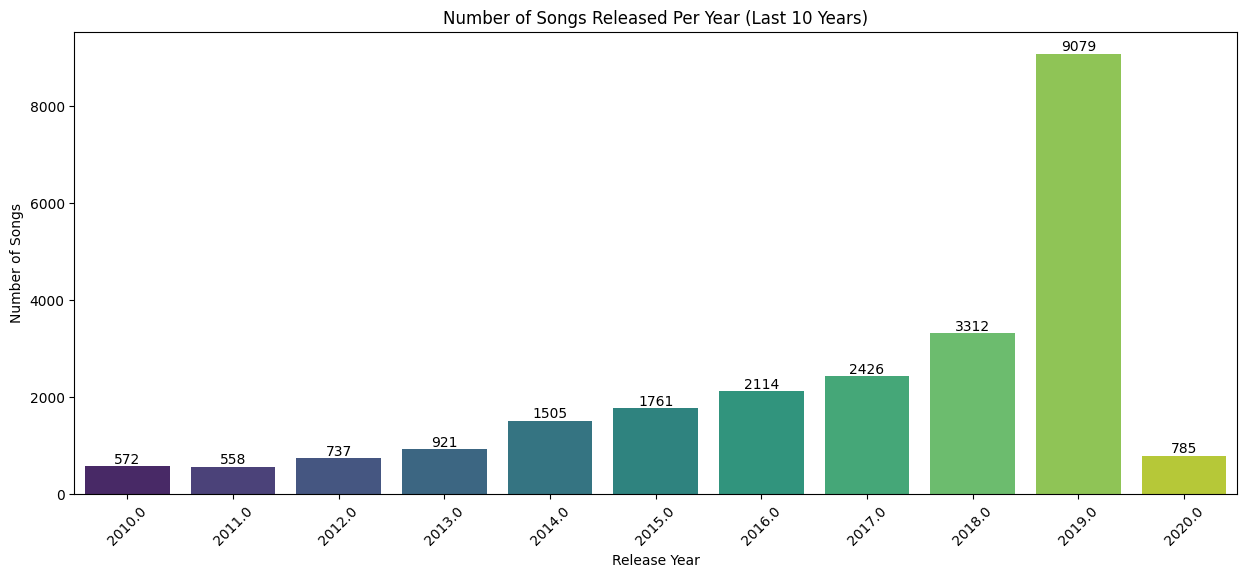

In [ ]:
# Filter data untuk 10 tahun terakhir
latest_10_years = df[df['release_year'] >= (df['release_year'].max() - 10)]

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='release_year', data=latest_10_years, palette="viridis")

# Menambahkan teks nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan tinggi batang
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menyesuaikan tampilan grafik
plt.title('Number of Songs Released Per Year (Last 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

Grafik diatas merupakan grafik release musik dalam 10 tahun terakhir. informasi yang didapatkan adalah
*   2019 merupakan tahun teraktif pada industri musik dimana pada tahun tersebut ada total 9076 lagu yang release
*   Sedangkan tahun 2010 adalah tahun dengan release lagu yang bisa dibilang jauh lebih sedikit dibanding tahun 2019 yaitu hanya sebanyakl 572 lagu
*   Secara umum, ada peningkatan signifikan dalam jumlah lagu yang dirilis dari tahun 2010 hingga 2019, dengan penurunan pada tahun 2020.





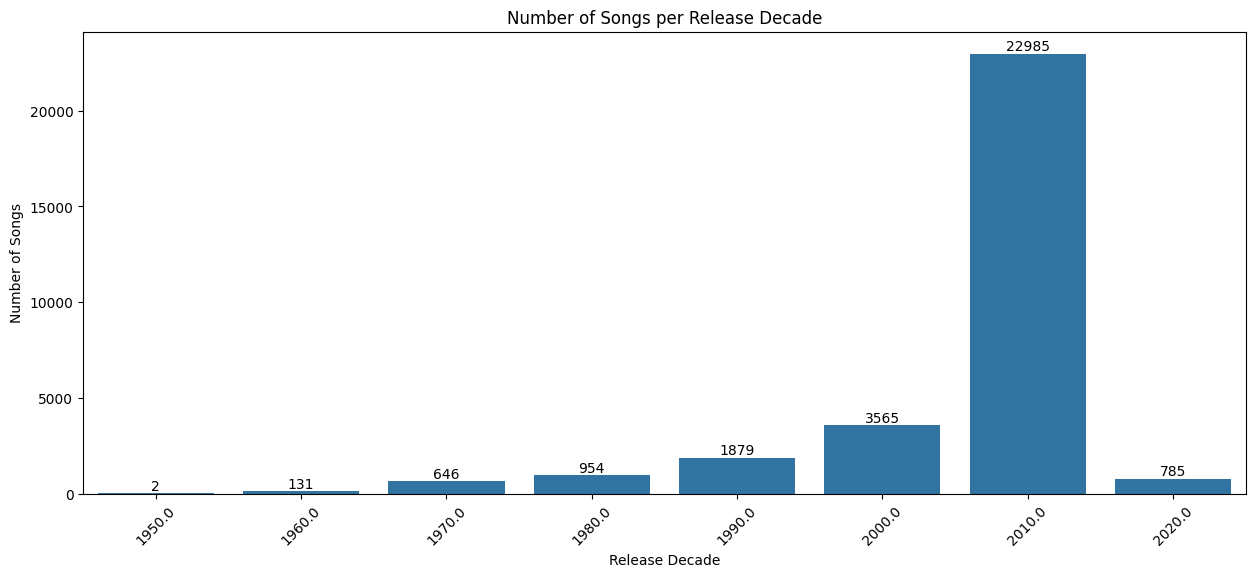

In [ ]:
df['release_decade'] = (df['release_year'] // 10) * 10

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='release_decade', data=df)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above bar
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the chart
plt.title('Number of Songs per Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

Grafik diatas merupakan grafik music release persepuluh tahun atau perdekade. Dimana dekade terbanyak release lagu adalah dekade 2010-2019 dengan total 22.985 lagu yang release.

## Genre Of the Year

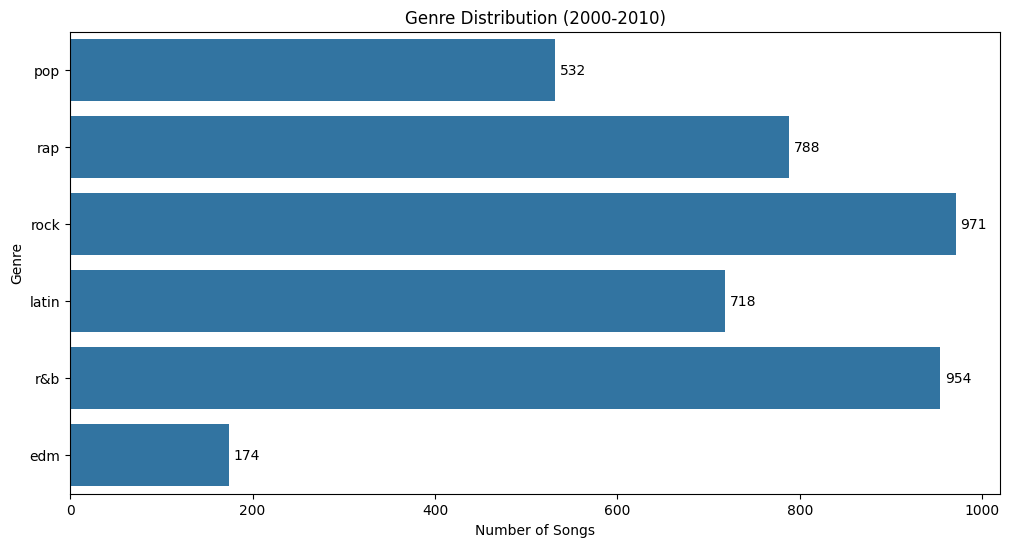

In [ ]:
# Filter data for the years 2000-2010
df_2000_2010 = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2010)]

# Create a countplot for genres within the specified years
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='playlist_genre', data=df_2000_2010)
plt.title('Genre Distribution (2000-2010)')  # Perbaiki judul
plt.xlabel('Number of Songs')
plt.ylabel('Genre')

# Menambahkan anotasi ke bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

plt.show()



Pada periode dekade 2000 hingga 2010, berdasarkan grafik yang telah dibuat, berikut adalah analisis mengenai distribusi genre lagu:

* Genre Rock mendominasi dekade ini dengan 971 lagu, menempati posisi teratas pada grafik.
* Genre R&B mengikuti dengan jumlah yang hampir sama, yaitu 954 lagu, hanya sedikit tertinggal dari genre Rock.
* Genre EDM memiliki jumlah yang paling sedikit pada dekade ini, dengan hanya 174 lagu.

Hal ini menunjukkan bahwa pada dekade tersebut, genre Rock dan R&B lebih populer dibandingkan EDM, yang tampaknya baru mulai berkembang lebih pesat setelah dekade 2010.

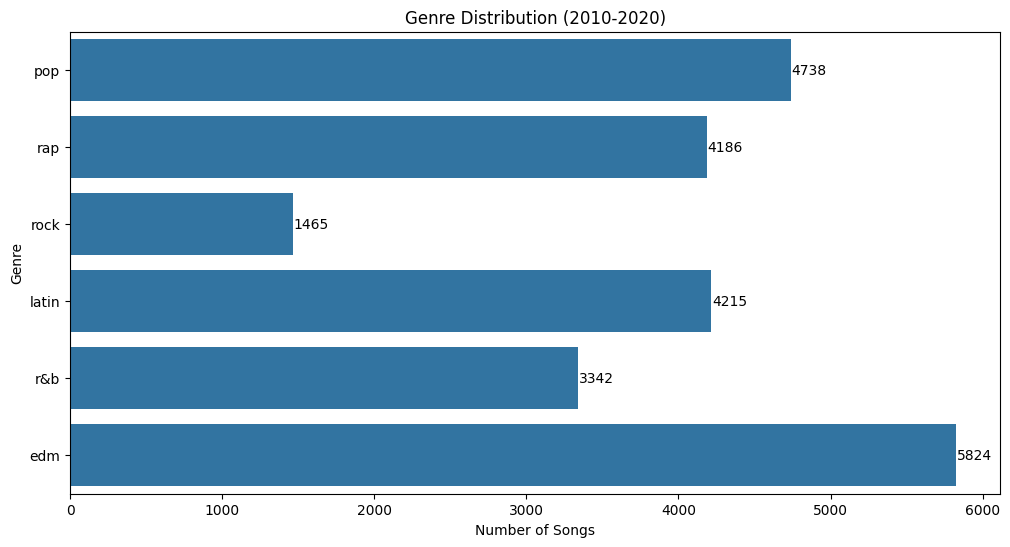

In [ ]:
# Filter data for the years 2000-2010
df_2000_2010 = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2020)]

# Create a countplot for genres within the specified years
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='playlist_genre', data=df_2000_2010)
plt.title('Genre Distribution (2010-2020)')  # Perbaiki judul
plt.xlabel('Number of Songs')
plt.ylabel('Genre')

# Menambahkan anotasi ke bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

plt.show()

Grafik yang tertera menunjukkan distribusi genre lagu antara tahun 2010 hingga 2020. Berikut adalah analisis berdasarkan grafik tersebut:
* Genre EDM berada di posisi kedua dengan 5,824 lagu menunjukkan popularitas genre ini di dekade tersebut.
* Genre Pop memiliki jumlah lagu terbanyak, yaitu 4,738 lagu
* Genre Rock memiliki jumlah lagu yang lebih sedikit dibandingkan genre lainnya, dengan 1,465

Berdasarkan grafik ini, dapat disimpulkan bahwa Pop dan EDM adalah genre yang paling dominan pada dekade 2010-2020, sementara Rock menjadi genre dengan jumlah lagu paling sedikit berbanding terbalik dengan dekade sebelumnya.

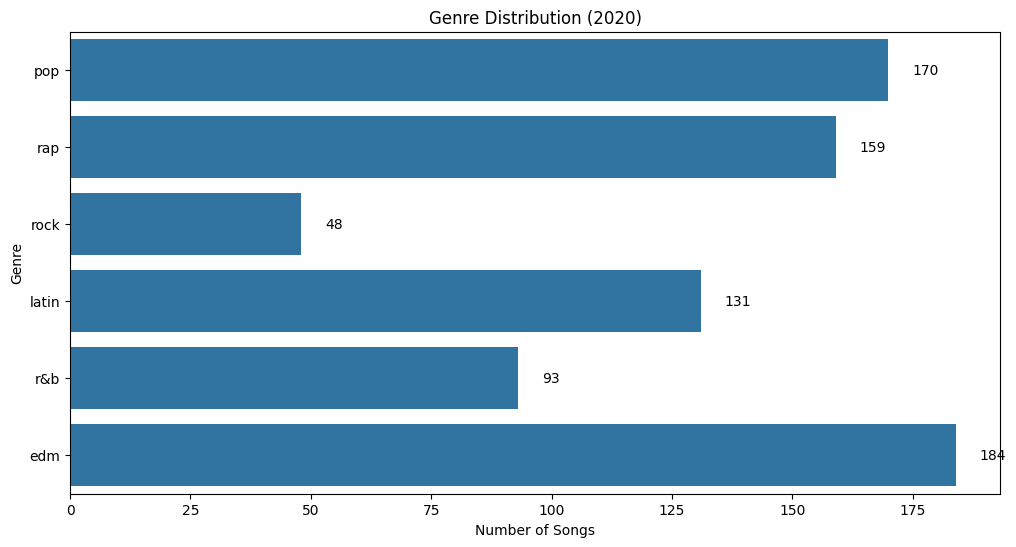

In [ ]:
# Filter data for the years 2020
df_2020 = df[(df['release_year'] == 2020)]

# Create a countplot for genres within the specified years
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='playlist_genre', data=df_2020)
plt.title('Genre Distribution (2020)')  # Perbaiki judul
plt.xlabel('Number of Songs')
plt.ylabel('Genre')

# Menambahkan anotasi ke bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

plt.show()

Grafik yang Anda berikan menunjukkan distribusi genre lagu pada tahun 2020. Berikut adalah analisis berdasarkan grafik tersebut:
* Genre EDM berada di posisi pertama dengan total 184 lagu menunjukkan popularitas genre ini di dekade tersebut.
* Genre Pop memiliki jumlah lagu kedua terbanyak, yakni 170 lagu.
* Genre Rock memiliki jumlah lagu yang lebih sedikit dibandingkan genre lainnya, dengan 48.

Berdasarkan grafik ini, dapat disimpulkan bahwa Pop dan EDM adalah genre yang paling dominan pada tahun 2020, sementara Rock menjadi genre dengan jumlah lagu paling sedikit. Hal ini dapat terjadi karena, semakin canggih maka genre lagu dengan melodi yang lebih rendah lebih disukai oleh masyarakat dari pada lagu dengan instrument keras seperti rock.

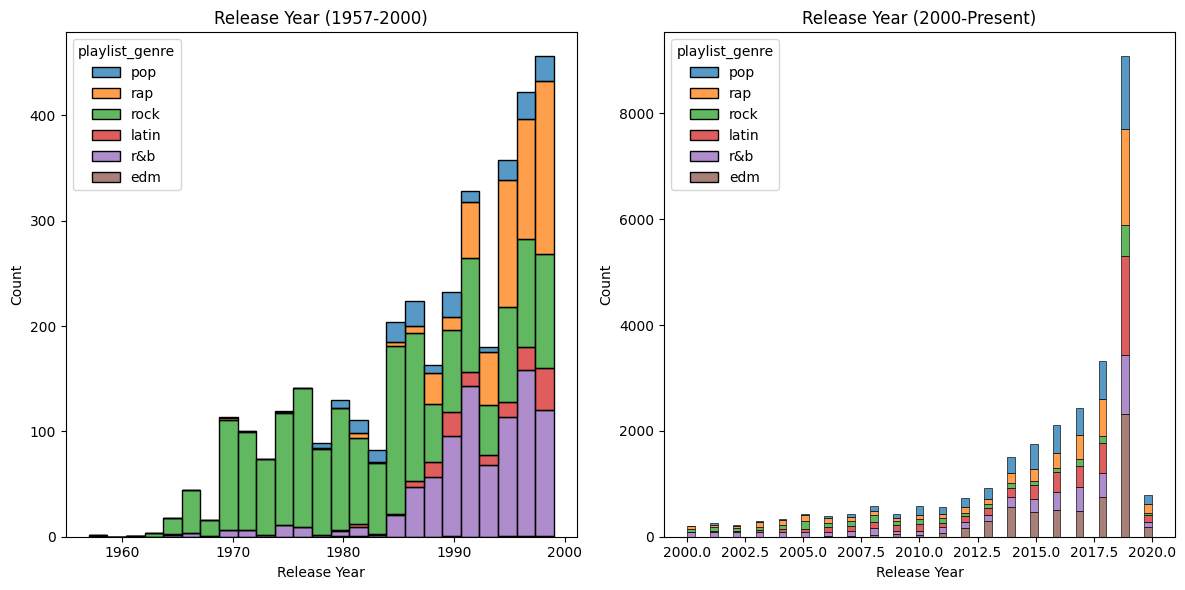

In [ ]:
# Create two separate DataFrames for years before and after 2000
df_before_2000 = df[(df['release_year'] >= 1957) & (df['release_year'] < 2000)]
df_after_2000 = df[df['release_year'] >= 2000]

# Create histograms for each period
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_before_2000, x='release_year', hue='playlist_genre', multiple='stack')
plt.title('Release Year (1957-2000)')
plt.xlabel('Release Year')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df_after_2000, x='release_year', hue='playlist_genre', multiple='stack')
plt.title('Release Year (2000-Present)')
plt.xlabel('Release Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Visualisasi di atas digunakan untuk menampilkan genre lagu yang populer dalam waktu tertentu. Seperti pada 1957-2000 dengan genre Rock dan tahun 2000-2020 dengan genre EDM, Pop, Latin, dan Rap


Top Songs in 2010.0:
  Genre: edm
    Song: Love The Way You Lie by Eminem (Popularity: 82)
  Genre: latin
    Song: Love The Way You Lie by Eminem (Popularity: 82)
  Genre: pop
    Song: Hey, Soul Sister by Train (Popularity: 82)
  Genre: r&b
    Song: Just the Way You Are by Bruno Mars (Popularity: 80)
  Genre: rap
    Song: No Hands (feat. Roscoe Dash & Wale) by Waka Flocka Flame (Popularity: 74)
  Genre: rock
    Song: What You Know by Two Door Cinema Club (Popularity: 71)

Top Songs in 2011.0:
  Genre: edm
    Song: Give Me Everything by Pitbull (Popularity: 79)
  Genre: latin
    Song: A Thousand Years by Christina Perri (Popularity: 79)
  Genre: pop
    Song: Mistletoe by Justin Bieber (Popularity: 84)
  Genre: r&b
    Song: Marvins Room by Drake (Popularity: 74)
  Genre: rap
    Song: Ni**as In Paris by JAY-Z (Popularity: 77)
  Genre: rock
    Song: Pumped Up Kicks by Foster The People (Popularity: 83)

Top Songs in 2012.0:
  Genre: edm
    Song: Can't Hold Us - feat. Ray Dalt

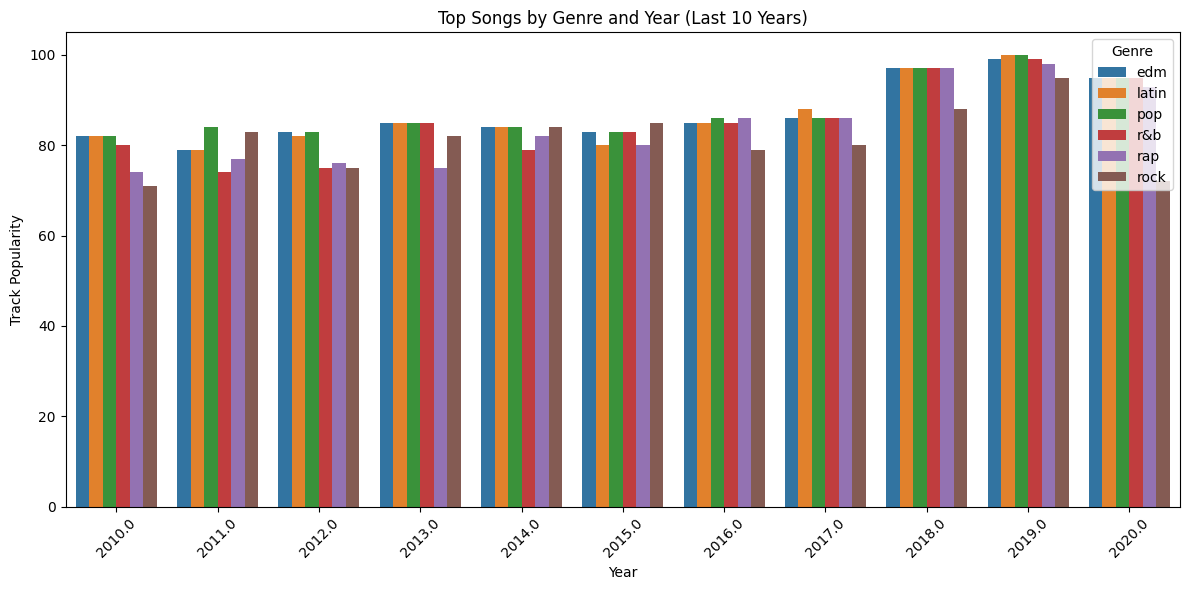

In [ ]:
# Filter data for the last 10 years
current_year = 2020  # Replace with the current year if needed
df_last_10_years = df[(df['release_year'] >= current_year - 10) & (df['release_year'] <= current_year)]

# Group by year and genre, then find the song with the highest popularity for each group
top_songs_by_year_genre = df_last_10_years.loc[df_last_10_years.groupby(['release_year', 'playlist_genre'])['track_popularity'].idxmax()]

# Print the results
for year, year_df in top_songs_by_year_genre.groupby('release_year'):
    print(f"\nTop Songs in {year}:")
    for genre, genre_df in year_df.groupby('playlist_genre'):
        print(f"  Genre: {genre}")
        print(f"    Song: {genre_df['track_name'].iloc[0]} by {genre_df['track_artist'].iloc[0]} (Popularity: {genre_df['track_popularity'].iloc[0]})")

# Optional: Create a visualization (e.g., bar plot) to show the top songs
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='track_popularity', hue='playlist_genre', data=top_songs_by_year_genre)
plt.title('Top Songs by Genre and Year (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

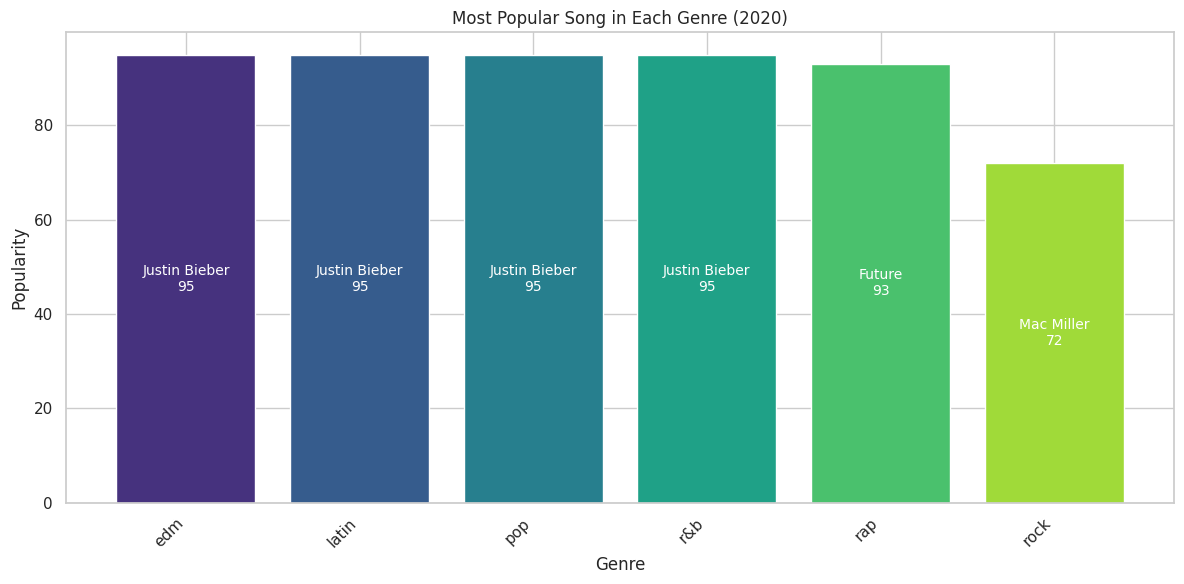

Genre: edm
  Artist: Justin Bieber
  Album: Yummy
  Song: Yummy
  Popularity: 95

Genre: latin
  Artist: Justin Bieber
  Album: Yummy
  Song: Yummy
  Popularity: 95

Genre: pop
  Artist: Justin Bieber
  Album: Yummy
  Song: Yummy
  Popularity: 95

Genre: r&b
  Artist: Justin Bieber
  Album: Yummy
  Song: Yummy
  Popularity: 95

Genre: rap
  Artist: Future
  Album: Life Is Good (feat. Drake)
  Song: Life Is Good (feat. Drake)
  Popularity: 93

Genre: rock
  Artist: Mac Miller
  Album: Circles
  Song: Woods
  Popularity: 72



In [39]:
# Filter data for the year 2020
df_2020 = df[df['release_year'] == 2020]

# Find the most popular song in each genre for 2020
top_songs_2020 = df_2020.loc[df_2020.groupby('playlist_genre')['track_popularity'].idxmax()]

# Create a custom color palette from Seaborn (e.g., 'viridis' palette)
palette = sns.color_palette("viridis", n_colors=len(top_songs_2020))

# Create the bar plot with the custom color palette
plt.figure(figsize=(12, 6))
bars = plt.bar(top_songs_2020['playlist_genre'], top_songs_2020['track_popularity'], color=palette)

# Add data labels inside the bars (track artist and popularity)
for bar, (i, row) in zip(bars, top_songs_2020.iterrows()):
    yval = bar.get_height()
    # Position the label inside the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        yval / 2,  # Y-coordinate: halfway up the bar
        f"{row['track_artist']}\n{round(yval)}",  # Artist name and popularity
        ha='center', va='center', fontsize=10, color='white'
    )

plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Most Popular Song in Each Genre (2020)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the information of the most popular songs
for index, row in top_songs_2020.iterrows():
    print(f"Genre: {row['playlist_genre']}")
    print(f"  Artist: {row['track_artist']}")
    print(f"  Album: {row['track_album_name']}")
    print(f"  Song: {row['track_name']}")
    print(f"  Popularity: {row['track_popularity']}\n")


## Categorial

Disini bikin variable baru berupa kategorial untuk popularitas

In [ ]:
def categorize_popularity(popularity):
  if popularity < 30:
    return 'low'
  elif 30 <= popularity <= 60:
    return 'medium'
  else:
    return 'trending'

# Apply the function to create the new column
df['kategori_popularitas'] = df['track_popularity'].apply(categorize_popularity)
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_decade,kategori_popularitas
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019.0,2010.0,trending
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019.0,2010.0,trending
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019.0,2010.0,trending
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019.0,2010.0,medium
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019.0,2010.0,trending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014.0,2010.0,medium
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013.0,2010.0,low
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014.0,2010.0,low
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014.0,2010.0,low


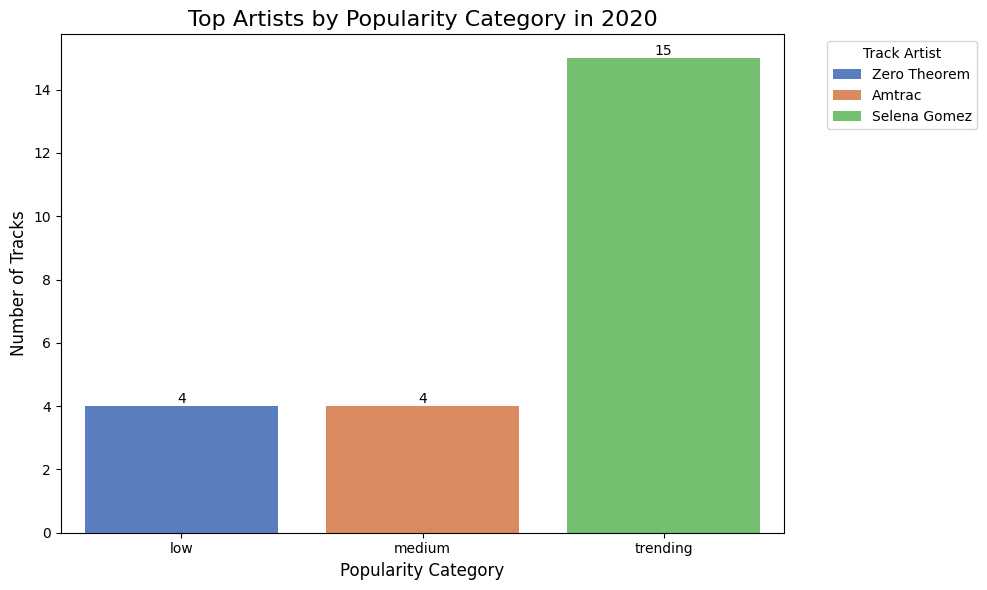

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk tahun 2020 saja
df_2020 = df[df['release_year'] == 2020]

# Hitung jumlah trek per artis untuk setiap kategori popularitas
artist_popularity = df_2020.groupby(['track_artist', 'kategori_popularitas']).size().reset_index(name='count')

# Temukan artis dengan jumlah trek terbanyak di setiap kategori
top_artists = artist_popularity.loc[artist_popularity.groupby('kategori_popularitas')['count'].idxmax()]

# Buat barplot hanya untuk artis yang terpilih
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='kategori_popularitas',
    y='count',
    hue='track_artist',
    data=top_artists,
    palette='muted'
)

# Tambahkan judul dan label
plt.title('Top Artists by Popularity Category in 2020', fontsize=16)
plt.xlabel('Popularity Category', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Track Artist', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Tambahkan anotasi pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan anotasi jika ada data
        ax.annotate(
            f'{int(height)}',  # Jumlah trek
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()


Visualisasi di atas digunakan untuk menampilkan popularitas artis pada tahun 2020 dengan 3 kategori popularitas yakni low, medium, dan trending (yang dimiliki oleh Selena Gomez)

## Longest Track

<ipython-input-37-a038014cdb2a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='playlist_genre', y='duration_minutes', data=longest_tracks, palette="viridis")


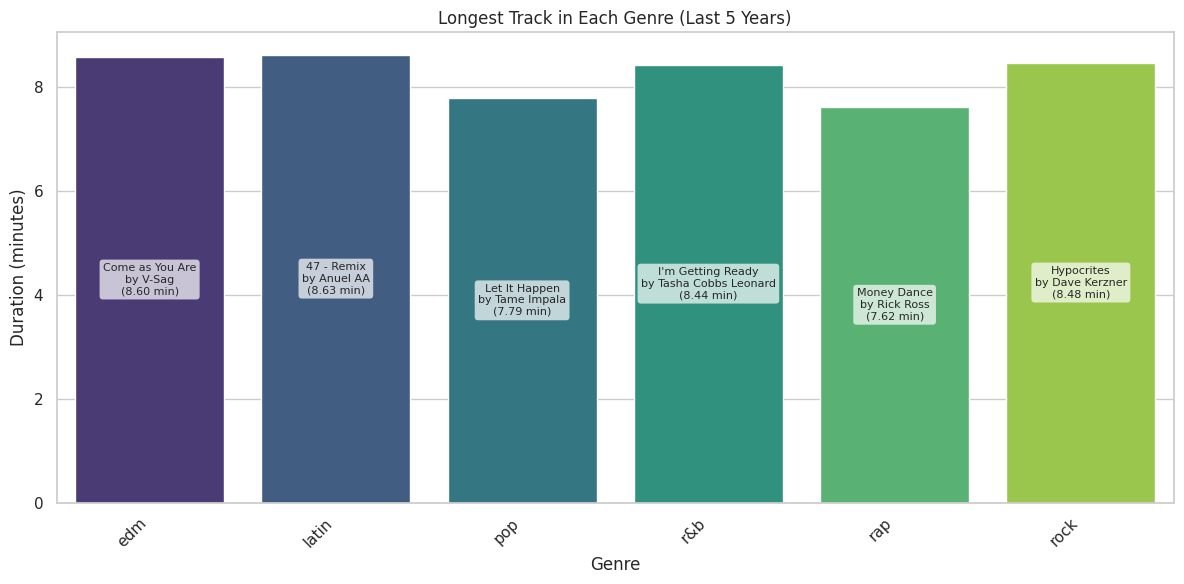

In [37]:
# Convert duration_ms to minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Filter data for the last 10 years
current_year = 2020
df_last_5_years = df[(df['release_year'] >= current_year - 5) & (df['release_year'] <= current_year)]

# Group by genre and find the track with the longest duration
longest_tracks = df_last_5_years.loc[df_last_5_years.groupby('playlist_genre')['duration_minutes'].idxmax()]

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='playlist_genre', y='duration_minutes', data=longest_tracks, palette="viridis")
plt.title('Longest Track in Each Genre (Last 5 Years)')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')

# Add text annotations inside the bars
for p, genre in zip(ax.patches, longest_tracks['playlist_genre']):
    track_info = longest_tracks[longest_tracks['playlist_genre'] == genre]
    track_name = track_info['track_name'].values[0]
    track_artist = track_info['track_artist'].values[0]
    duration = p.get_height()

    ax.annotate(
        f"{track_name}\nby {track_artist}\n({duration:.2f} min)",
        xy=(p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Position text inside the bar
        ha='center', va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white", alpha=0.7)
    )

plt.tight_layout()
plt.show()

Visualisasi barchart di atas digunakan untuk menampilkan track lagu terpanjang di setiap genre

## Record of the year

Penghargaan ini diberikan kepada rekaman yang tidak hanya mencapai prestasi luar biasa dalam hal popularitas dan dampak emosional, tetapi juga yang menunjukkan tingkat inovasi artistik yang tinggi, mengubah cara musik diproduksi dan dinikmati. Dalam tahun yang dipenuhi dengan begitu banyak rilisan baru, pemenang kategori ini berhasil menonjol dengan kemampuan untuk menciptakan dampak yang bertahan lama, baik melalui kualitas produksi yang revolusioner maupun pengaruh yang dirasakannya di berbagai kalangan pendengar. Lagu ini mampu memadukan kedalaman emosional dengan kreativitas yang tidak hanya memenuhi ekspektasi, tetapi juga membuka jalan bagi tren musik yang lebih luas. Dengan berbagai rilisan yang terus bermunculan sepanjang tahun, hanya rekaman yang menawarkan sesuatu yang lebih dari sekadar popularitas yang dapat memikat hati audiens global dan bertahan sebagai karya yang relevan dan berpengaruh dalam jangka panjang. Pemenang dalam kategori ini adalah lagu yang mampu menavigasi kompleksitas pasar musik yang jenuh dan tetap menjadi ikon yang dihormati, membuktikan bahwa bahkan di tengah maraknya rilis baru, ada karya yang tetap meninggalkan jejak tak terhapuskan.

In [ ]:
df['track_artist'].value_counts()

,count
track_artist,
Martin Garrix,161
Queen,136
The Chainsmokers,123
David Guetta,110
Don Omar,102
...,...
Heartist,1
Evans Blue,1
Bad Seed Rising,1


<ipython-input-24-bb89aa5fd285>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_count', y='track_artist', data=top_artists_1_year, palette='viridis')
<ipython-input-24-bb89aa5fd285>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_count', y='track_artist', data=top_artists_5_years, palette='magma')
<ipython-input-24-bb89aa5fd285>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_count', y='track_artist', data=top_artists_10_years, palette='plasma')


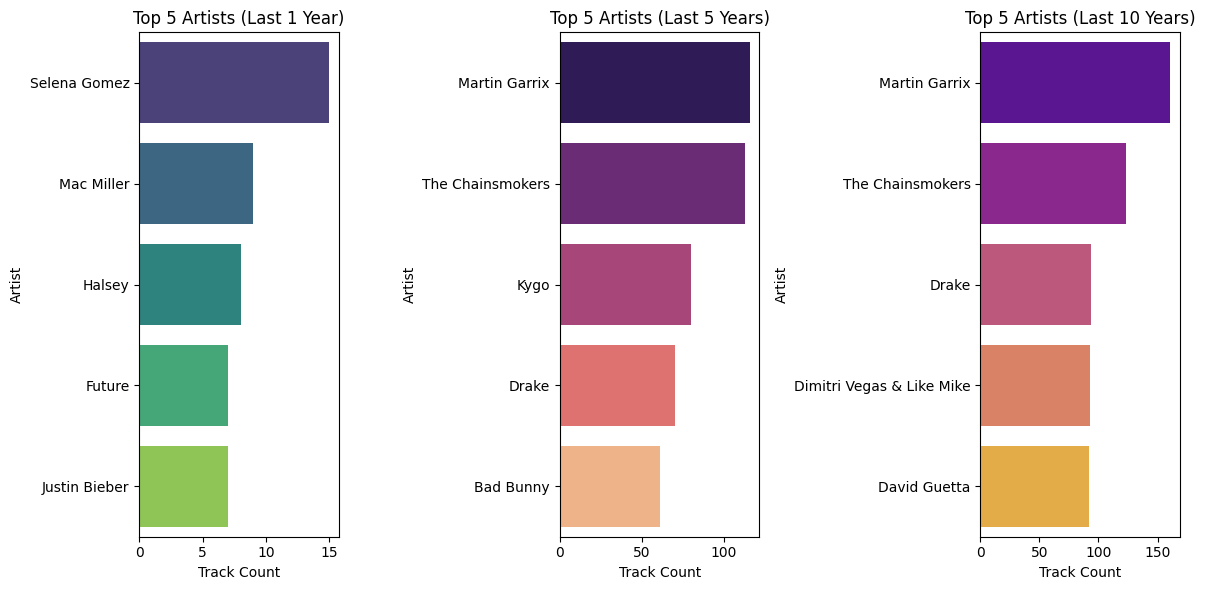

In [ ]:
def top_artists_by_period(df, period):
    # Group by artist and count releases within the specified period
    artist_counts = df.groupby('track_artist')['track_name'].count().reset_index()
    artist_counts = artist_counts.rename(columns={'track_name': 'track_count'})
    # Sort by track count in descending order and select top 5 artists
    top_artists = artist_counts.sort_values(by='track_count', ascending=False).head(5)
    return top_artists

# Top artists in the last 1 year (assuming the latest data is the current year)
current_year = df['release_year'].max()
df_last_year = df[df['release_year'] == current_year]
top_artists_1_year = top_artists_by_period(df_last_year, 1)

# Top artists in the last 5 years
df_last_5_years = df[df['release_year'] >= current_year - 4]
top_artists_5_years = top_artists_by_period(df_last_5_years, 5)

# Top artists in the last 10 years
df_last_10_years = df[df['release_year'] >= current_year - 9]
top_artists_10_years = top_artists_by_period(df_last_10_years, 10)


# Create the plot
plt.figure(figsize=(12, 6))

# Bar plot for top artists in the last 1 year
plt.subplot(1, 3, 1)
sns.barplot(x='track_count', y='track_artist', data=top_artists_1_year, palette='viridis')
plt.title('Top 5 Artists (Last 1 Year)')
plt.xlabel('Track Count')
plt.ylabel('Artist')

# Bar plot for top artists in the last 5 years
plt.subplot(1, 3, 2)
sns.barplot(x='track_count', y='track_artist', data=top_artists_5_years, palette='magma')
plt.title('Top 5 Artists (Last 5 Years)')
plt.xlabel('Track Count')
plt.ylabel('Artist')

# Bar plot for top artists in the last 10 years
plt.subplot(1, 3, 3)
sns.barplot(x='track_count', y='track_artist', data=top_artists_10_years, palette='plasma')
plt.title('Top 5 Artists (Last 10 Years)')
plt.xlabel('Track Count')
plt.ylabel('Artist')


plt.tight_layout()
plt.show()

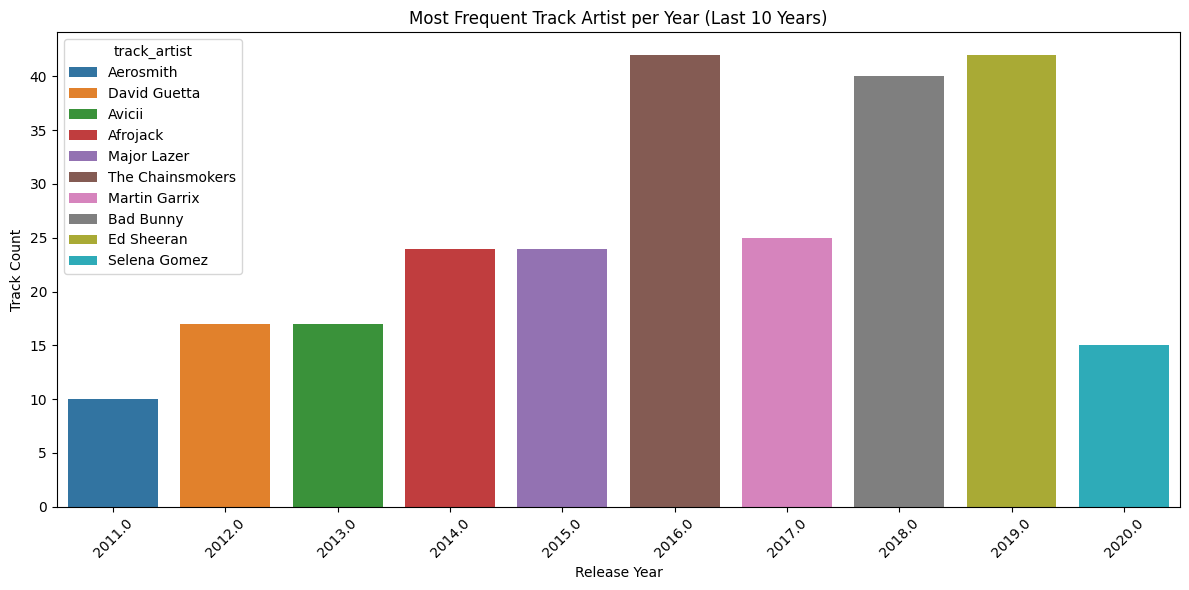

In [ ]:
# prompt: tunjukkan plot track_artist terbanyak pertahun dalam 10 tahun terakhir

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and is already loaded

# Filter data for the last 10 years
current_year = df['release_year'].max()
df_last_10_years = df[df['release_year'] >= current_year - 9]

# Group by year and artist, then count the number of tracks
artist_counts_by_year = df_last_10_years.groupby(['release_year', 'track_artist'])['track_name'].count().reset_index()
artist_counts_by_year = artist_counts_by_year.rename(columns={'track_name': 'track_count'})

# Find the most frequent artist for each year
most_frequent_artists = artist_counts_by_year.loc[artist_counts_by_year.groupby('release_year')['track_count'].idxmax()]

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='track_count', hue='track_artist', data=most_frequent_artists, dodge=False)
plt.title('Most Frequent Track Artist per Year (Last 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penghargaan Record of the Year diberikan kepada
* 2011 - Aerosmith
* 2012 - David Guetta
* 2013 - Avicii
* 2014 - Afrojack
* 2015 - Major Lazer
* 2016 - The Chainsmokers
* 2017 - Martin Garrix
* 2018 - Bad Bunny
* 2019 - Ed Sheeran
* 2020 - Selena Gomes


## Artist Of The Year

Penghargaan **Artist of the Year** diberikan setiap tahun kepada artis yang meraih popularitas tertinggi berdasarkan penilaian poin yang mengukur seberapa besar pengaruh dan kesuksesan mereka pada tahun tersebut. Poin ini mencakup berbagai faktor, seperti penjualan musik, popularitas di media sosial, dan prestasi lainnya dalam industri musik.

In [ ]:
def award_top_artist(df):
    # Group data by year and artist, then find the artist with the highest popularity in each year
    top_artists_by_year = df.groupby(['release_year', 'track_artist'])['track_popularity'].max().reset_index()

    # Find the artist with the highest popularity for each year
    top_artists_by_year = top_artists_by_year.loc[top_artists_by_year.groupby('release_year')['track_popularity'].idxmax()]

    return top_artists_by_year

# Assuming 'df' is your DataFrame and contains columns 'release_year', 'track_artist', and 'track_popularity'
top_artists = award_top_artist(df)
top_artists

,release_year,track_artist,track_popularity
0,1957.0,Ray Charles,59
1,1958.0,Elvis Presley,73
2,1961.0,Chavela Vargas,47
5,1963.0,The Beatles,71
7,1964.0,Simon & Garfunkel,74
...,...,...,...
7772,2016.0,Travis Scott,86
8367,2017.0,Imagine Dragons,88
10702,2018.0,Trevor Daniel,97
14976,2019.0,Tones and I,100


Tabel diatas merupakan artist dengan popularitas pada tahunnya, dimulai tahun 1957 - 2020

In [ ]:
# Filter data for the last 10 years
current_year = df['release_year'].max()
df_last_10_years = df[df['release_year'] >= current_year - 9]

# Group by year and artist, then find the artist with the highest popularity in each year
top_artists_by_year = df_last_10_years.groupby(['release_year', 'track_artist'])['track_popularity'].max().reset_index()

# Find the artist with the highest popularity for each year
top_artists_by_year = top_artists_by_year.loc[top_artists_by_year.groupby('release_year')['track_popularity'].idxmax()]

# Display the result
top_artists_by_year

,release_year,track_artist,track_popularity
153,2011.0,Justin Bieber,84
535,2012.0,Macklemore & Ryan Lewis,83
930,2013.0,John Legend,85
1249,2014.0,Aaron Smith,84
2770,2015.0,Tame Impala,85
3877,2016.0,Travis Scott,86
4472,2017.0,Imagine Dragons,88
6807,2018.0,Trevor Daniel,97
11081,2019.0,Tones and I,100
11797,2020.0,Justin Bieber,95


       release_year             track_artist  track_popularity
153          2011.0            Justin Bieber                84
535          2012.0  Macklemore & Ryan Lewis                83
930          2013.0              John Legend                85
1249         2014.0              Aaron Smith                84
2770         2015.0              Tame Impala                85
3877         2016.0             Travis Scott                86
4472         2017.0          Imagine Dragons                88
6807         2018.0            Trevor Daniel                97
11081        2019.0              Tones and I               100
11797        2020.0            Justin Bieber                95


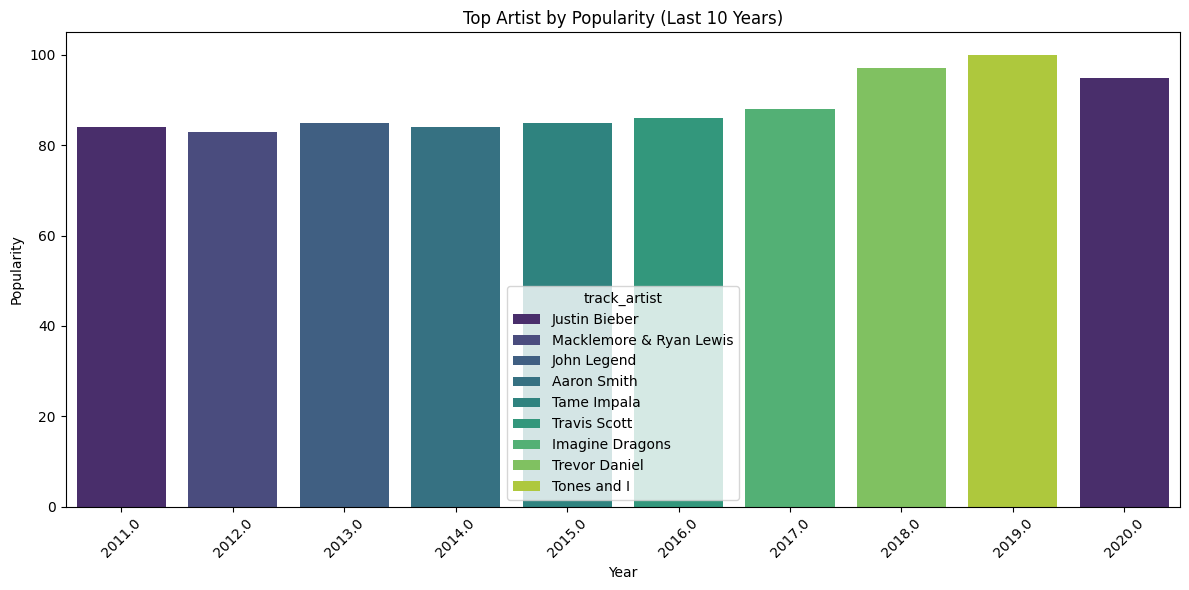

In [ ]:
current_year = df['release_year'].max()
df_last_10_years = df[df['release_year'] >= current_year - 9]

# Group data by year and artist, then find the artist with the highest popularity in each year
top_artists_by_year = df_last_10_years.groupby(['release_year', 'track_artist'])['track_popularity'].max().reset_index()

# Find the artist with the highest popularity for each year
top_artists_by_year = top_artists_by_year.loc[top_artists_by_year.groupby('release_year')['track_popularity'].idxmax()]

# Merge with the original DataFrame to get the track name
top_artists_with_tracks = pd.merge(top_artists_by_year, df, on=['release_year', 'track_artist', 'track_popularity'], how='left')

# Display the result with track names
print(top_artists_by_year[['release_year', 'track_artist', 'track_popularity']])

# Create the plot for the last 10 years, including track names in the hover tooltip
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='track_popularity', hue='track_artist', data=top_artists_by_year, palette='viridis')
plt.title('Top Artist by Popularity (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penghargaan Artist of the Year diberikan kepada artis dengan poin popularitas tertinggi pada tahun tersebut. Berikut adalah daftar penerima penghargaan ini dalam beberapa tahun terakhir:

* 2011: Justin Bieber – 84 poin popularitas
* 2012: Macklemore & Ryan Lewis – 83 poin popularitas
* 2013: John Legend – 85 poin popularitas
* 2014: Sam Smith – 84 poin popularitas
* 2015: Tame Impala – 85 poin popularitas
* 2016: Travis Scott – 86 poin popularitas
* 2017: Imagine Dragons – 88 poin popularitas
* 2018: Trevor Daniel – 97 poin popularitas
* 2019: Tones and I – 100 poin popularitas
* 2020: Justin Bieber - 95 poin popularitas

Setiap artis yang tercatat dalam daftar ini menunjukkan kesuksesan dan pengaruh luar biasa pada tahun-tahun tersebut, yang tercermin dari jumlah poin popularitas yang mereka raih.

## Album Of The Year

Penghargaan Album of the Year diberikan setiap tahun kepada album yang meraih popularita dampaknya terhadap industri musik serta budaya populer. Sejak 1957 hingga 2020, album yang memenangkan penghargaan ini mencerminkan tren musik yang berkembang dan bagaimana preferensi pendengar berubah seiring waktu.

Penerima penghargaan ini adalah album yang tidak hanya mencatatkan penjualan tinggi, tetapi juga meninggalkan jejak yang mendalam dalam dunia musik. Album yang memenangkan penghargaan ini sering kali menjadi tonggak penting dalam karier artis, mengangkat genre musik tertentu, atau menciptakan gelombang tren baru di kalangan penggemar.

In [ ]:
# prompt: buatkan versi album terpopuler pertahun

def album_of_the_year(df):
    # Group data by year and album, then find the album with the highest average popularity in each year
    album_popularity = df.groupby(['release_year', 'track_album_name'])['track_popularity'].mean().reset_index()

    # Find the album with the highest average popularity for each year
    album_of_the_year = album_popularity.loc[album_popularity.groupby('release_year')['track_popularity'].idxmax()]

    return album_of_the_year

# Assuming 'df' is your DataFrame
top_albums = album_of_the_year(df)
top_albums

,release_year,track_album_name,track_popularity
0,1957.0,"Ray Charles (aka: Hallelujah, I Love Her So)",59.000000
1,1958.0,Elvis' Golden Records,73.000000
2,1961.0,Chavela Vargas,47.000000
4,1963.0,Please Please Me (Remastered),71.000000
11,1964.0,"Wednesday Morning, 3 A.M.",74.000000
...,...,...,...
7754,2016.0,Birds In The Trap Sing McKnight,86.000000
10603,2017.0,÷ (Deluxe),85.142857
12910,2018.0,lovely (with Khalid),89.000000
14208,2019.0,Dance Monkey (Stripped Back) / Dance Monkey,100.000000


Tabel diatas merupakan tabel dengan album yang memiliki popularitas tiap tahunnya, dimulai dari tahun 1957 - 2020

In [ ]:
# Filter data for the last 10 years
current_year = df['release_year'].max()
df_last_10_years = df[df['release_year'] >= current_year - 9]

# Group data by year and album, then find the album with the highest average popularity in each year
album_popularity = df_last_10_years.groupby(['release_year', 'track_album_name'])['track_popularity'].mean().reset_index()

# Find the album with the highest average popularity for each year
album_of_the_year = album_popularity.loc[album_popularity.groupby('release_year')['track_popularity'].idxmax()]

# Merge with the original DataFrame to get the artist name
album_of_the_year = pd.merge(album_of_the_year, df[['track_album_name', 'track_artist', 'release_year']], on=['track_album_name', 'release_year'], how='left')

# Display the result with artist names, printing one album per year
for year in album_of_the_year['release_year'].unique():
  album_info = album_of_the_year[album_of_the_year['release_year'] == year].iloc[0]
  print(f"{year}: {album_info['track_album_name']} by {album_info['track_artist']} dengan popularity {album_info['track_popularity']}")

2011.0: Under The Mistletoe (Deluxe Edition) by Justin Bieber dengan popularity 84.0
2012.0: Unorthodox Jukebox by Bruno Mars dengan popularity 78.66666666666667
2013.0: Love In The Future (Expanded Edition) by John Legend dengan popularity 85.0
2014.0: Dancin (feat. Luvli) [Krono Remix] by Aaron Smith dengan popularity 84.0
2015.0: Uptown Special by Mark Ronson dengan popularity 82.0
2016.0: Birds In The Trap Sing McKnight by Travis Scott dengan popularity 86.0
2017.0: ÷ (Deluxe) by Ed Sheeran dengan popularity 85.14285714285714
2018.0: lovely (with Khalid) by Billie Eilish dengan popularity 89.0
2019.0: Dance Monkey (Stripped Back) / Dance Monkey by Tones and I dengan popularity 100.0
2020.0: Yummy by Justin Bieber dengan popularity 95.0


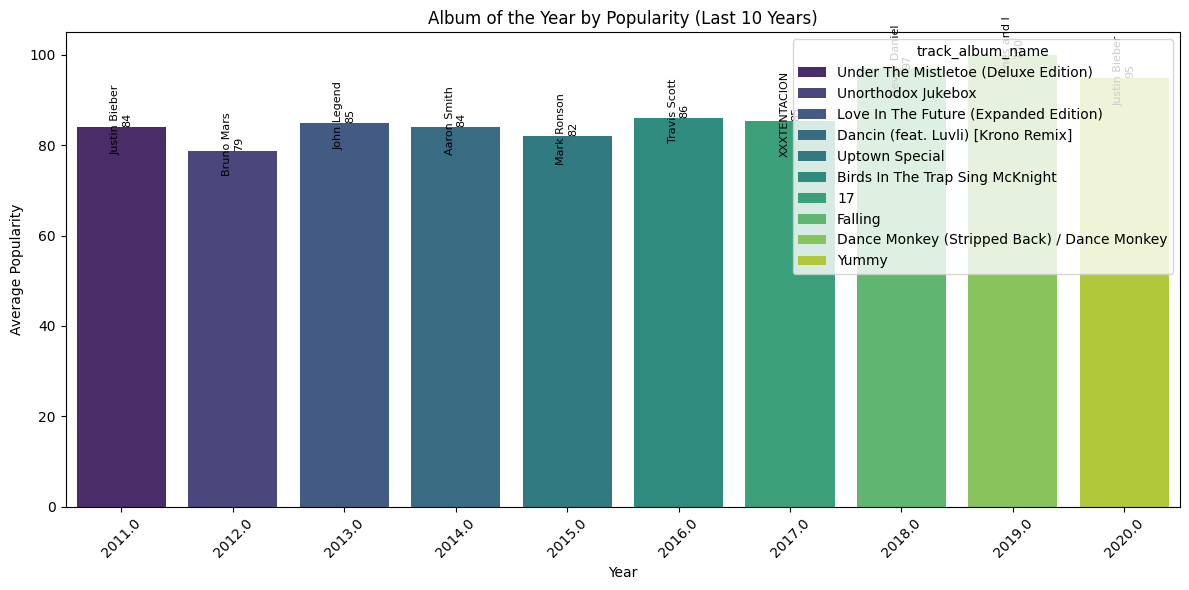

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the last 10 years
current_year = df['release_year'].max()
df_last_10_years = df[df['release_year'] >= current_year - 9]

# Group data by year, album, and artist, then find the album with the highest average popularity in each year
album_popularity = df_last_10_years.groupby(['release_year', 'track_album_name', 'track_artist'])['track_popularity'].mean().reset_index()

# Find the album with the highest average popularity for each year
album_of_the_year = album_popularity.loc[album_popularity.groupby('release_year')['track_popularity'].idxmax()]

# Create the plot for the last 10 years
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='release_year', y='track_popularity', hue='track_album_name', data=album_of_the_year, palette='viridis', dodge=False)

# Get the unique release years and their corresponding x-axis positions
release_years = album_of_the_year['release_year'].unique()
x_positions = [p.get_x() + p.get_width() / 2 for p in ax.patches]
x_pos_dict = dict(zip(release_years, x_positions))

# Add text annotations for the artist and the popularity value, adjusting positions
for index, row in album_of_the_year.iterrows():
    height = row['track_popularity']
    artist_name = row['track_artist']
    release_year = row['release_year']

    # Get the x-position for the current release year
    x_pos = x_pos_dict[release_year]

    ax.annotate(f'{artist_name}\n{height:.0f}',
                (x_pos, height),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=90)

# Customize the chart
plt.title('Album of the Year by Popularity (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Album of the Year merupakan reward yang diberikan kepada artis dengan pupularitas album paling tinggi ditahun tersebut, dan didapatkan oleh:
* 2011 - Under The Mistletoe (Deluxe Edition) by Justin Bieber
* 2012 - Unorthodox Jukebox by Bruno Mars
* 2013 - Love In The Future (Expanded Edition) by John Legend
* 2014 - Dancin (feat. Luvli) [Krono Remix] by Aaron Smith
* 2015 - Uptown Special by Mark Ronson
* 2016 - Birds In The Trap Sing McKnight by Travis Scott
* 2017 - ÷ (Deluxe) by Ed Sheeran
* 2018 - lovely (with Khalid) by Billie Eilish
* 2019 - Dance Monkey (Stripped Back) / Dance Monkey by Tones and I
* 2020 - Yummy by Justin Bieber


## Rookie Of the Year


Penghargaan Rookie of the Year diberikan kepada artis atau grup musik yang baru memulai karier mereka dan berhasil mencuri perhatian serta meraih kesuksesan luar biasa pada tahun tersebut. Penerima penghargaan ini biasanya adalah artis yang pertama kali memasuki industri musik dengan karya yang mendapat apresiasi tinggi dari publik dan kritikus, serta menunjukkan potensi besar untuk berkembang lebih jauh.

Rookie of the Year sering kali mencerminkan generasi baru dalam dunia musik, membawa suara, gaya, dan genre baru yang segar. Artis atau grup yang menerima penghargaan ini biasanya mencatatkan debut yang kuat melalui single hits, album pertama yang sukses, atau penampilan yang mengesankan di panggung internasional.

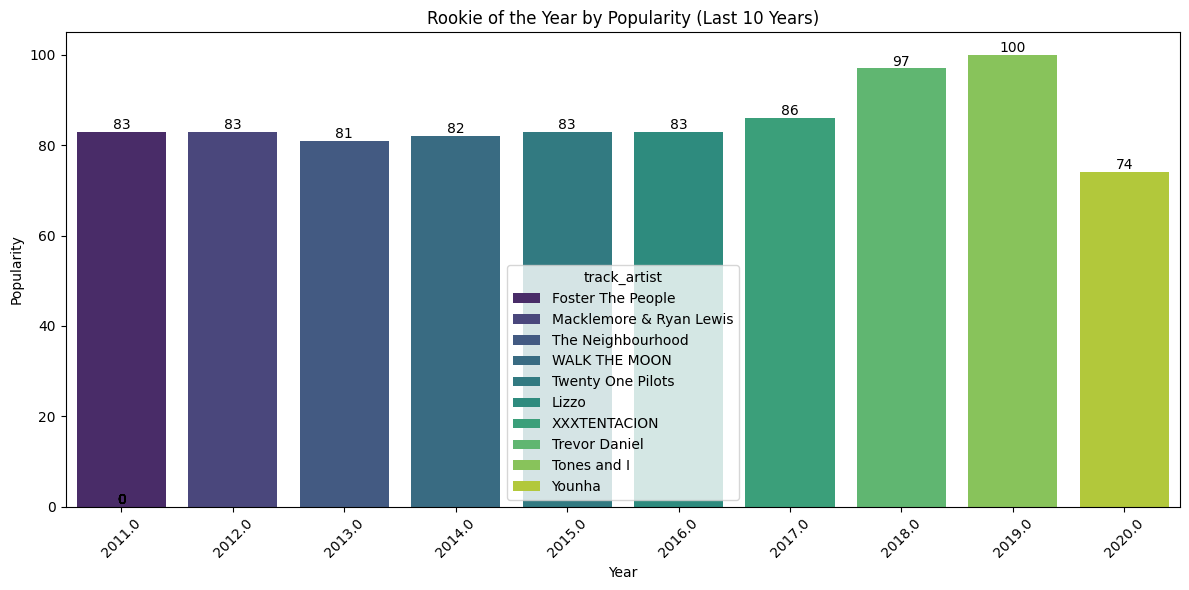

In [ ]:
def rookie_of_the_year(df):
    # Find the first year each artist appeared
    first_appearance = df.groupby('track_artist')['release_year'].min().reset_index()
    first_appearance = first_appearance.rename(columns={'release_year': 'first_year'})

    # Merge with the original DataFrame to get popularity
    merged_df = pd.merge(df, first_appearance, on='track_artist')

    # Filter for the first year of each artist
    rookie_df = merged_df[merged_df['release_year'] == merged_df['first_year']]

    # Find the rookie with the highest popularity in each year
    rookie_of_the_year = rookie_df.loc[rookie_df.groupby('release_year')['track_popularity'].idxmax()]

    return rookie_of_the_year

# Get the rookie of the year data
rookie_data = rookie_of_the_year(df)

# Filter data for the last 10 years
current_year = df['release_year'].max()
rookie_data_10_years = rookie_data[rookie_data['release_year'] >= current_year - 9]

# Create the plot for the last 10 years
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='release_year', y='track_popularity', hue='track_artist', data=rookie_data_10_years, palette='viridis', dodge=False)

# Add text annotations for popularity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the chart
plt.title('Rookie of the Year by Popularity (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penghargaan Rookie of the Year diberikan kepada
* 2011 - Foster the People
* 2012 - Macklemore & Ryan Lewis
* 2013 - The Neighbourhood
* 2014 - Walk The Moon
* 2015 - Twenty One Pilots
* 2016 - Lizzo
* 2017 - XXXTENCAION
* 2018 - Trevor Daniel
* 2019 - Tones and I
* 2020 - Younha

Penghargaan ini didasarkan pada release lagu pertama dan nilai poplarity  pada spotify